In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("date_inghetata.csv")
# Afisare primele 5
df.head()

,temperatura,vanzari,luna,zi_saptamana
0,8,25,ianuarie,luni
1,10,35,ianuarie,marti
2,12,45,ianuarie,miercuri
3,15,55,ianuarie,joi
4,18,75,ianuarie,vineri


In [7]:
df[ ["vanzari", "temperatura" ]].head()

,vanzari,temperatura
0,25,8
1,35,10
2,45,12
3,55,15
4,75,18


In [8]:
df[ [ "temperatura", "vanzari", ]].head()

,temperatura,vanzari
0,8,25
1,10,35
2,12,45
3,15,55
4,18,75


In [10]:
df_temp_vanz = df[ [ "temperatura", "vanzari", ]]
df_temp_vanz.info(), df_temp_vanz.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   temperatura  238 non-null    int64
 1   vanzari      238 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


(None,
        temperatura     vanzari
 count   238.000000  238.000000
 mean     28.731092  147.663866
 std       8.713148   64.122809
 min       8.000000   25.000000
 25%      22.000000   95.000000
 50%      29.000000  142.000000
 75%      36.000000  195.000000
 max      45.000000  288.000000)

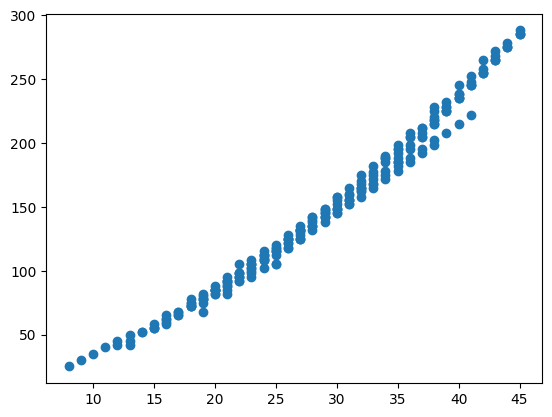

In [12]:
plt.scatter(df["temperatura"], df["vanzari"]);

In [15]:
temp_train, temp_test, vanz_train, vanz_test = train_test_split(df["temperatura"], df["vanzari"], test_size=0.22)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [17]:
model = LinearRegression()
model



LinearRegression()

In [19]:
np.array(temp_train).max()

np.int64(45)

In [20]:
temp_train = np.array(temp_train).reshape((-1, 1))
model.fit(temp_train, vanz_train)

LinearRegression()

In [22]:
model.score(np.array(temp_test).reshape((-1, 1)), vanz_test)

0.9769377808003756

In [ ]:
x = df[["temperatura", "luna", "zi_saptamana"]]
x.head(2)

,temperatura,luna
0,8,ianuarie
1,10,ianuarie


In [36]:
lunile_anului = {
    "ianuarie": 1, "februarie":2, "martie":3, "aprilie":4, "mai":5, "iunie":6, "iulie":7, "august":8, "septembrie":9, "octombrie":10, "noiembrie":11, "decembrie":12
}

In [37]:
x["luna"] = x["luna"].map(lambda x: lunile_anului[x])
x

/var/folders/93/qw471b_96px9kvlzs8__bk480000gn/T/ipykernel_4553/1118168517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["luna"] = x["luna"].map(lambda x: lunile_anului[x])


,temperatura,luna
0,8,1
1,10,1
2,12,1
3,15,1
4,18,1
...,...,...
233,33,5
234,35,5
235,37,5
236,39,5


In [26]:
y = df["vanzari"]

In [38]:
model = LinearRegression()

In [39]:
model.fit(x, y)

LinearRegression()

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [44]:
luna_df= df[["luna"]]
luna_df.head(15)

,luna
0,ianuarie
1,ianuarie
2,ianuarie
3,ianuarie
4,ianuarie
5,ianuarie
6,ianuarie
7,ianuarie
8,ianuarie
9,ianuarie


In [43]:
label_encoder.fit_transform(luna_df)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  7,  7

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
luna_df= df[["luna"]]
luna_df.head(1)

,luna
0,ianuarie


In [53]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder

OneHotEncoder(sparse_output=False)

In [ ]:
one_hot_encoder.fit(luna_df)
one_hot_encoder.transform(luna_df)

In [54]:
result = one_hot_encoder.fit_transform(luna_df)

In [58]:
"ianuarie:", result[0], "februarie:", result[15], "martie:", result[30]

('ianuarie:',
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'februarie:',
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'martie:',
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))